In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
submission = pd.read_csv("/kaggle/input/spaceship-titanic/sample_submission.csv")

In [3]:
train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


TRAIN DATA SET
PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Transported     0.000000
dtype: float64
shape  (8693, 14)
TEST DATA SET
PassengerId     0.000000
HomePlanet      0.010008
CryoSleep       0.010698
Cabin           0.011504
Destination     0.010583
Age             0.010468
VIP             0.010698
RoomService     0.009433
FoodCourt       0.012194
ShoppingMall    0.011273
Spa             0.011619
VRDeck          0.009203
Name            0.010813
dtype: float64
shape  (4277, 13)


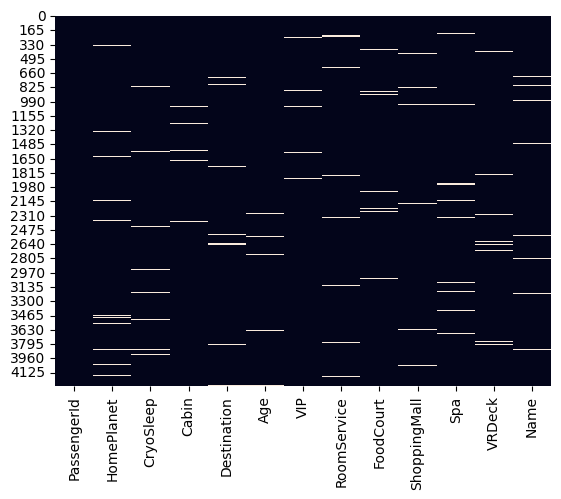

In [6]:
print("="*100)
print("TRAIN DATA SET")
print(train.isna().sum()/len(train))
print("="*100)
print("shape ", train.shape)
print("="*100)
sns.heatmap(train.isnull(),cbar=False)
print("="*100)
print("TEST DATA SET")
print(test.isna().sum()/len(train))
print("="*100)
print("shape ", test.shape)
print("="*100)
sns.heatmap(test.isnull(),cbar=False)

plt.show()


the missing data is less then 5%.
so for numerical value we will take the median.

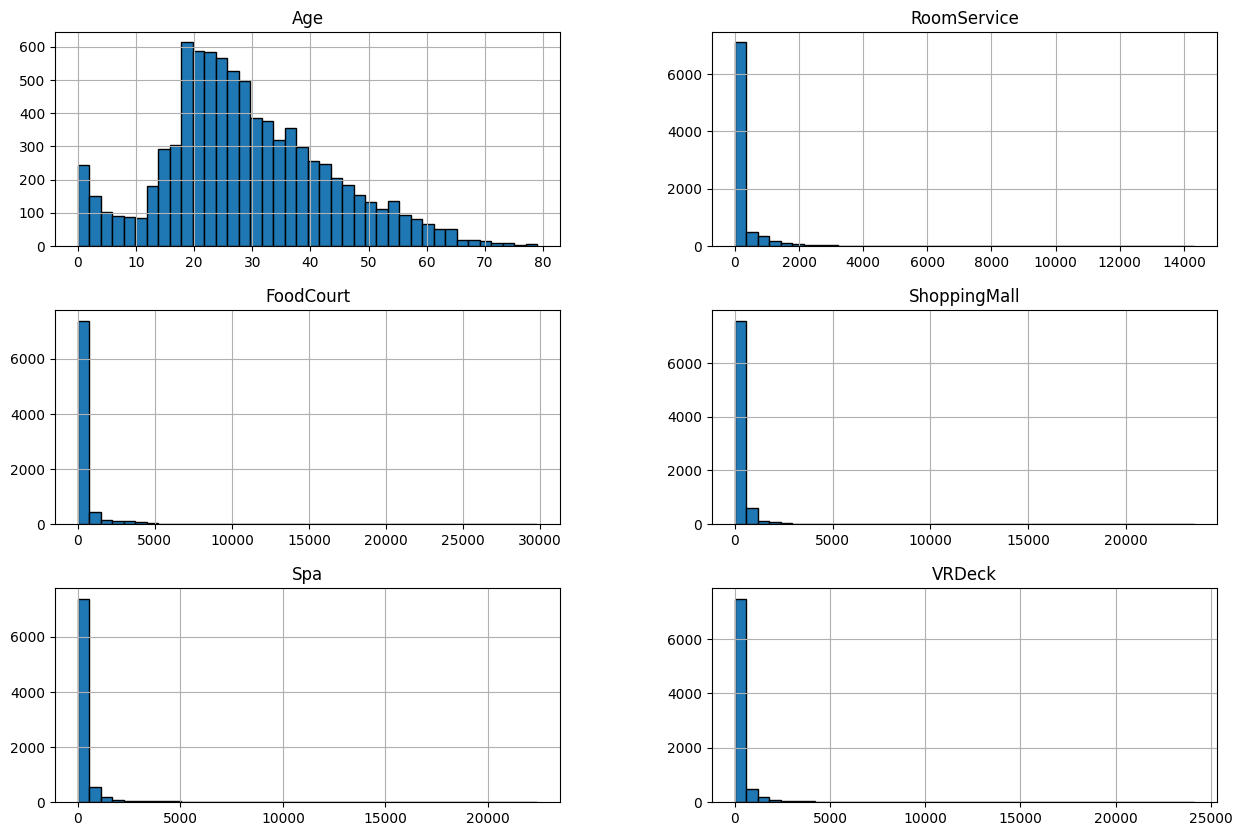

In [7]:
train.hist(bins=40, figsize=(15,10), edgecolor='k')
plt.show()

## Dealing with numerical values

In [8]:
num_features = ['Age', 'RoomService','FoodCourt',"ShoppingMall", 'Spa' ,'VRDeck']

for feature in num_features:
    median = train[feature].median()
    train[feature] = train[feature].fillna(median)

In [9]:
train['total_cost'] = train[num_features].sum(axis=1)

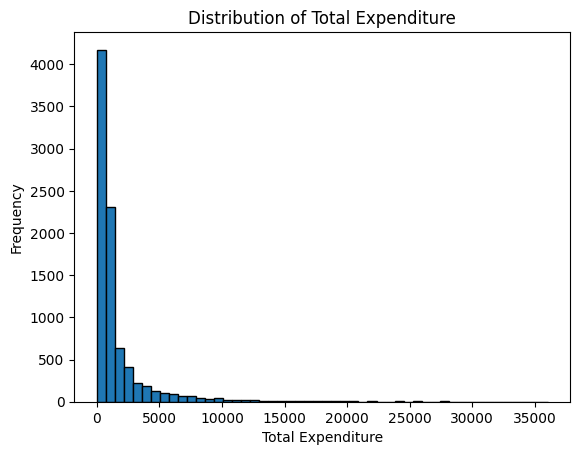

In [10]:
import matplotlib.pyplot as plt

# Histogram
plt.hist(train['total_cost'], bins=50, edgecolor='k')
plt.title('Distribution of Total Expenditure')
plt.xlabel('Total Expenditure')
plt.ylabel('Frequency')
plt.show()


In [11]:
print(train.isna().sum()/len(train))
print("="*100)
print("shape ", train.shape)
print("="*100)

PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.000000
VIP             0.023352
RoomService     0.000000
FoodCourt       0.000000
ShoppingMall    0.000000
Spa             0.000000
VRDeck          0.000000
Name            0.023007
Transported     0.000000
total_cost      0.000000
dtype: float64
shape  (8693, 15)


5 numerical attributes are skewed we must Standardize those attributes

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


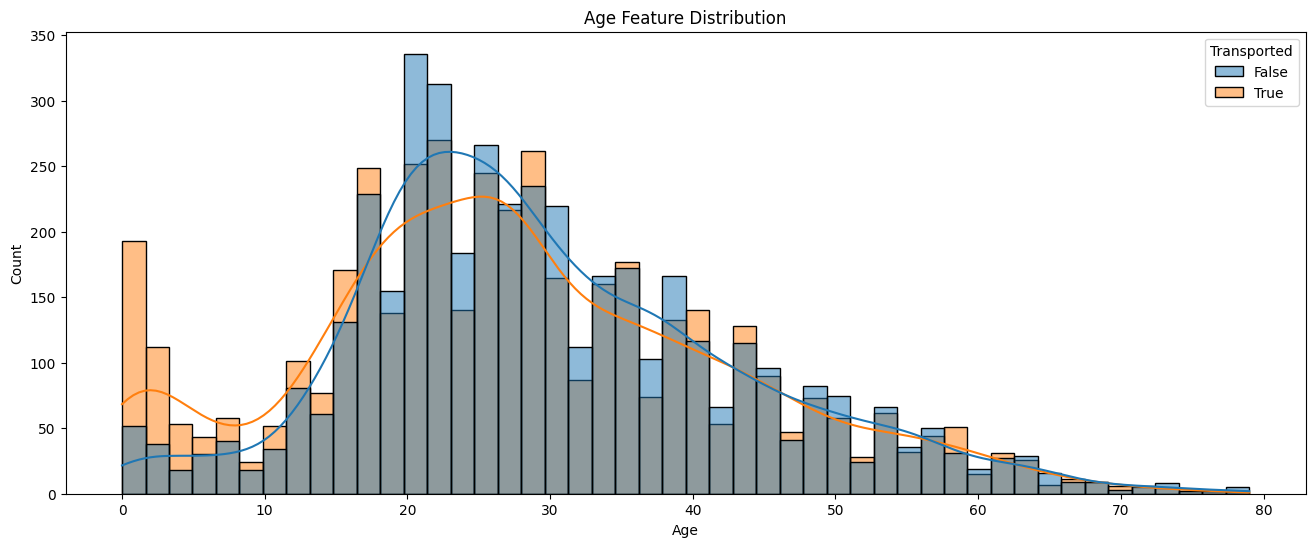

In [12]:
plt.figure(figsize=(16,6))
sns.histplot(x="Age",hue="Transported",data=train, kde=True)
plt.title("Age Feature Distribution");

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

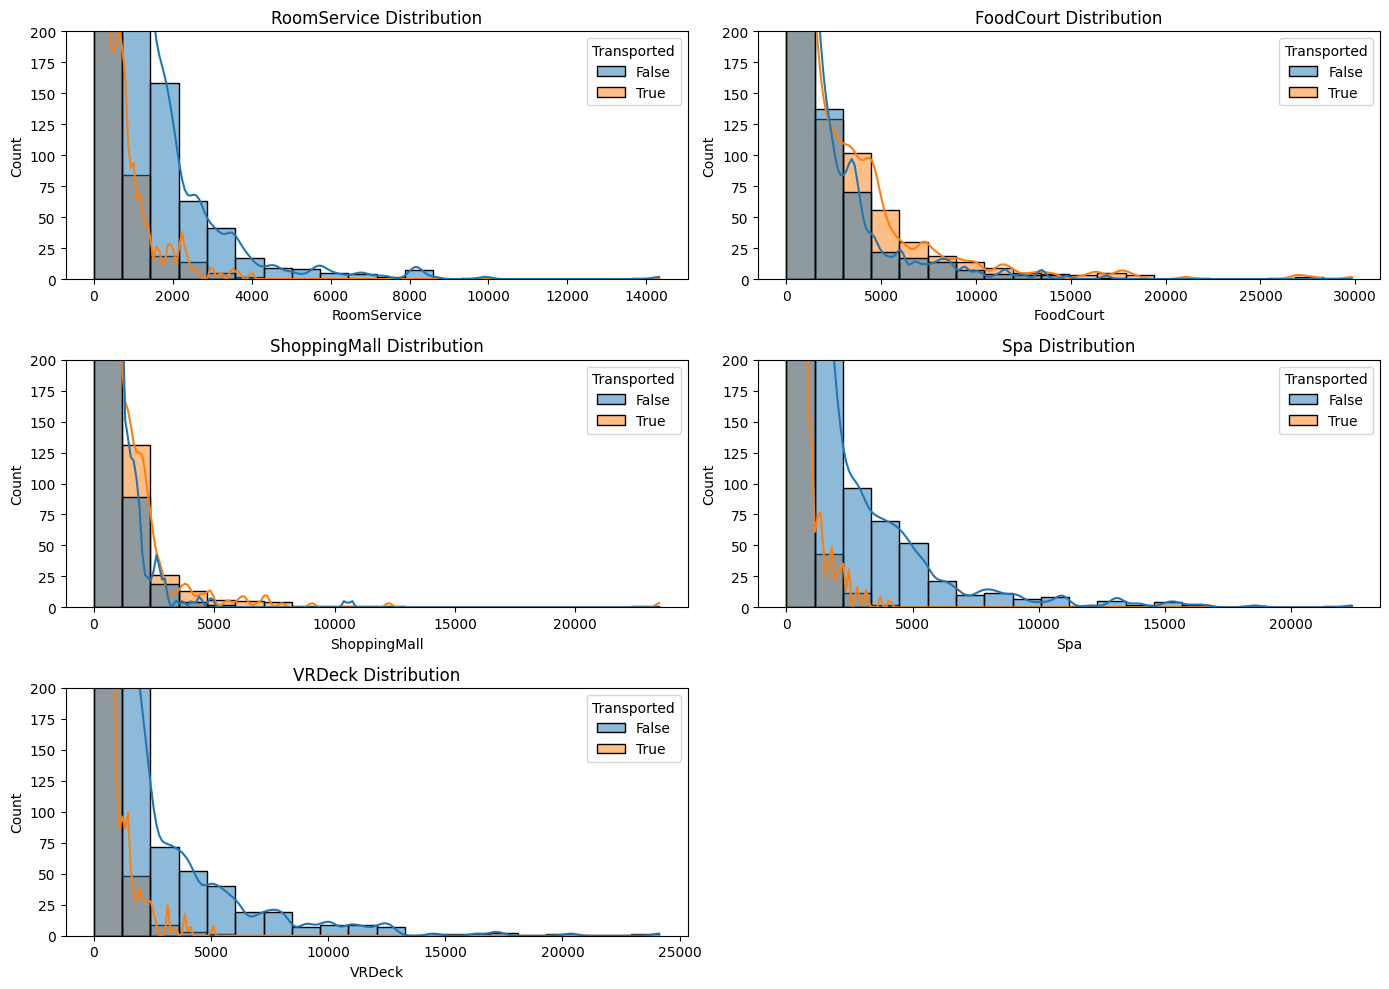

In [13]:
expendure = ['RoomService', "FoodCourt", "ShoppingMall","Spa","VRDeck"]


plt.figure(figsize=(14,10))
for i, column in enumerate(expendure):
    plt.subplot(3,2,i+1)
    sns.histplot(x=column, hue='Transported', data=train, bins=20, kde=True)
    plt.title(f"{column} Distribution")
    plt.ylim(0,200)
    plt.tight_layout()

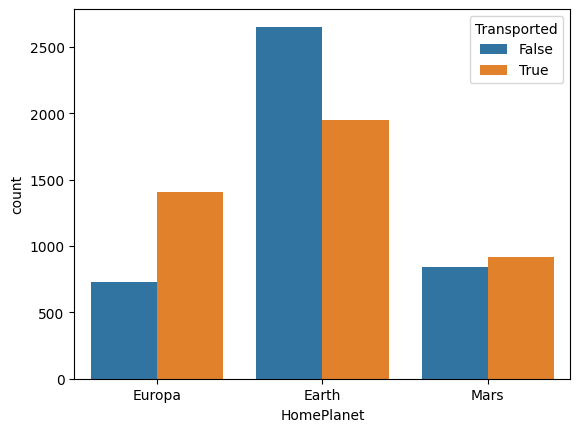

In [14]:
sns.countplot(x='HomePlanet',hue='Transported', data=train)
plt.show()

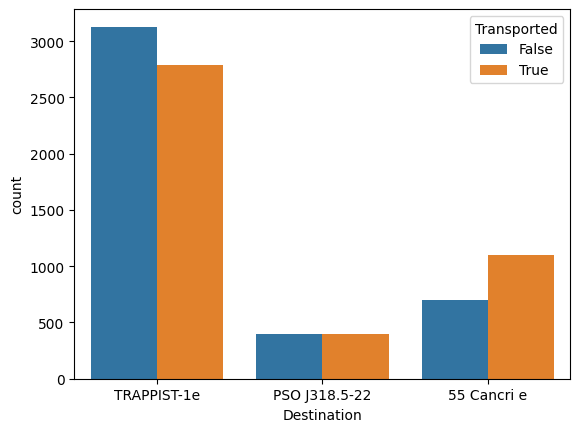

In [15]:
sns.countplot(x='Destination',hue='Transported', data=train)
plt.show()

destination for most of people was to TRAPPIST-1e

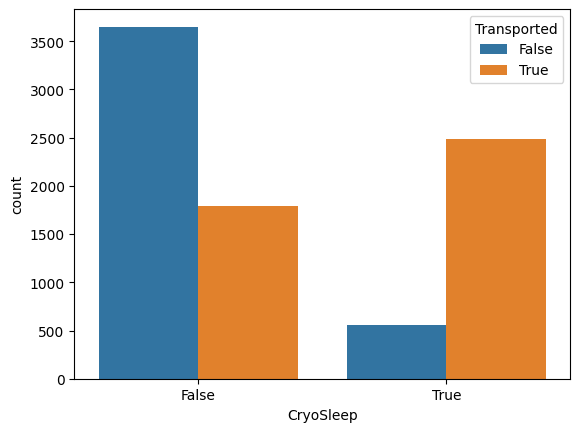

In [16]:
sns.countplot(x='CryoSleep',hue='Transported', data=train)
plt.show()

most of the transported we in cryosleep

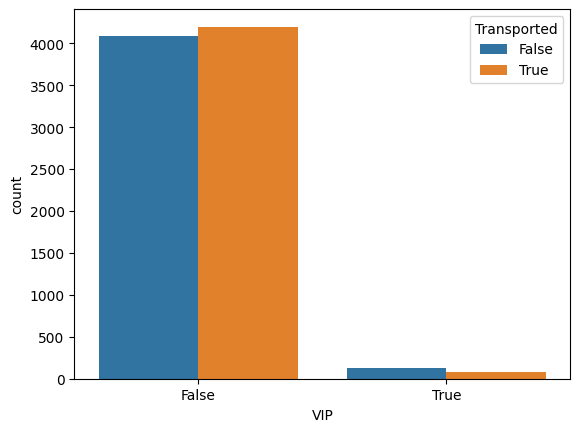

In [17]:
sns.countplot(x='VIP',hue='Transported', data=train)
plt.show()

nothing major pattern here except most of the passenger are not VIP didnt expect anything new here

In [18]:
train[['Deck', "Num", "Side"]] = train["Cabin"].str.split("/", expand=True)

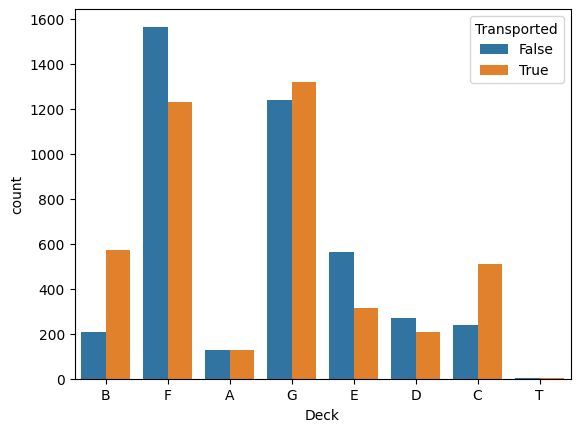

In [19]:
sns.countplot(x='Deck',hue='Transported', data=train)
plt.show()

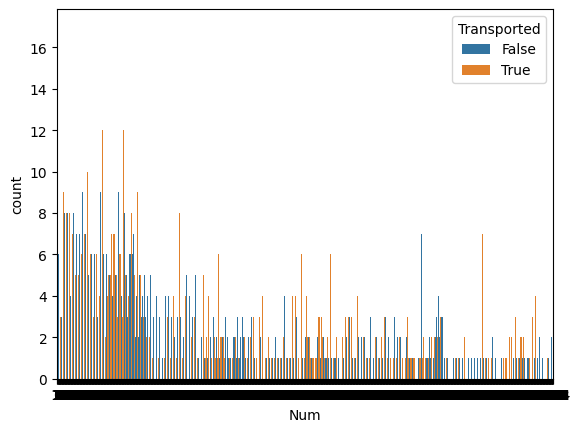

In [20]:
sns.countplot(x='Num',hue='Transported', data=train)
plt.show()

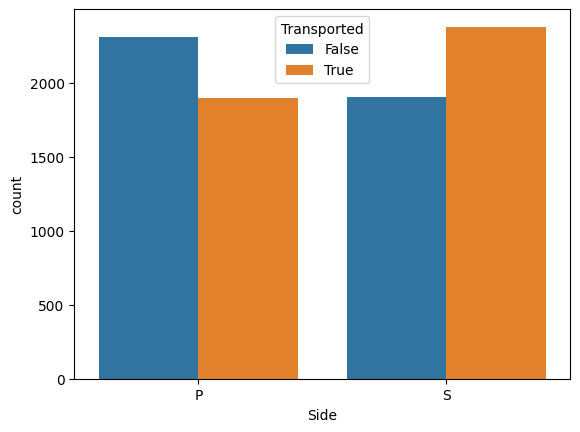

In [21]:
sns.countplot(x='Side',hue='Transported', data=train)
plt.show()

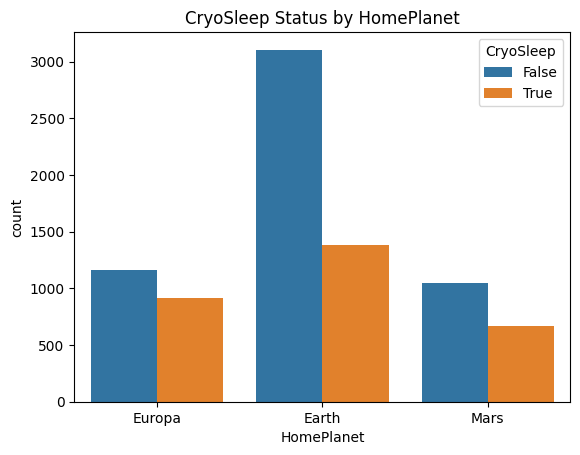

In [22]:
# Create a count plot
sns.countplot(data=train, x='HomePlanet', hue='CryoSleep')
plt.title("CryoSleep Status by HomePlanet")
plt.show()


In [23]:
train.drop(['Deck','Num','Side'],axis=1, inplace=True)

In [24]:
train["Name"] = train['Name'].fillna("unknown")
train['Destination'] = train["Destination"].fillna("TRAPPIST-1e")
train['VIP'] = train['VIP'].fillna(False)
train['HomePlanet'] = train['HomePlanet'].fillna("unknown")
train['CryoSleep'] = train['CryoSleep'].fillna(False)


In [25]:
num_features = ['Age', 	'RoomService', 	'FoodCourt', 	'ShoppingMall', 'Spa', 	'VRDeck']
cat_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported']

from sklearn.impute import SimpleImputer

cat_imputer = SimpleImputer(strategy="most_frequent")

cat_imputer.fit(train[cat_features])

SimpleImputer(strategy='most_frequent')

In [26]:
num_imputer = SimpleImputer(strategy='median')

num_imputer.fit(train[num_features])

SimpleImputer(strategy='median')